# Exploratory Data  Analysis

In [1]:
# Iporting relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

In [2]:
# Read datasets
X = pd.read_csv('data/Training-set-values.csv')
y = pd.read_csv('data/Training-set-labels.csv')

In [38]:
X.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [39]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [3]:
# Exploring y
y['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [41]:
X.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

In [4]:
# Reviewing NA values
X.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [5]:
# Formating data and time
X['date_recorded'] = pd.to_datetime(X['date_recorded'])

In [6]:
# Explore the dataset
display(X.describe())

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [8]:

# Selecting numerical data 
X_num = X.select_dtypes(exclude='object')
X_num = X_num.drop(['id', 'date_recorded'], axis=1)

In [9]:
# Selecting object type values
for column in X.select_dtypes(include='object'):
    print(X[column].value_counts())
    print('')

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
                          ... 
Theo                         1
Private Institutions         1
Selikali Ya Kijiji           1
Lottery                      1
Pwagu                        1
Name: funder, Length: 1897, dtype: int64

DWE                   17402
Government             1825
RWE                    1206
Commu                  1060
DANIDA                 1050
                      ...  
IN                        1
LDEP                      1
CONCE                     1
TASAF 1                   1
Zao water spring X        1
Name: installer, Length: 2145, dtype: int64

none                3563
Shuleni             1748
Zahanati             830
Msikitini            535
Kanisani             323
                    ... 
Kwa Sharia             1
Kwa Eliaza Urasa       1
Sundwi B               1
Tandu Matumbo          1
Kwa Bahati Mar

In [10]:
# Exploring unique values
for column in X_num:
    print(X[column].name)
    print(X[column].nunique())
    if X[column].nunique() < 30:
        print(X[column].unique())
    else:
        pass
    print('')

amount_tsh
98

gps_height
2428

longitude
57516

latitude
57517

num_private
65

region_code
27
[11 20 21 90 18  4 17 14 60 10  3 15 19 16 80  1  6  2 12 13  5  7 99 24
  9  8 40]

district_code
20
[ 5  2  4 63  1  8  3  6 43  7 23 33 53 62 60 30 13  0 80 67]

population
1049

construction_year
55



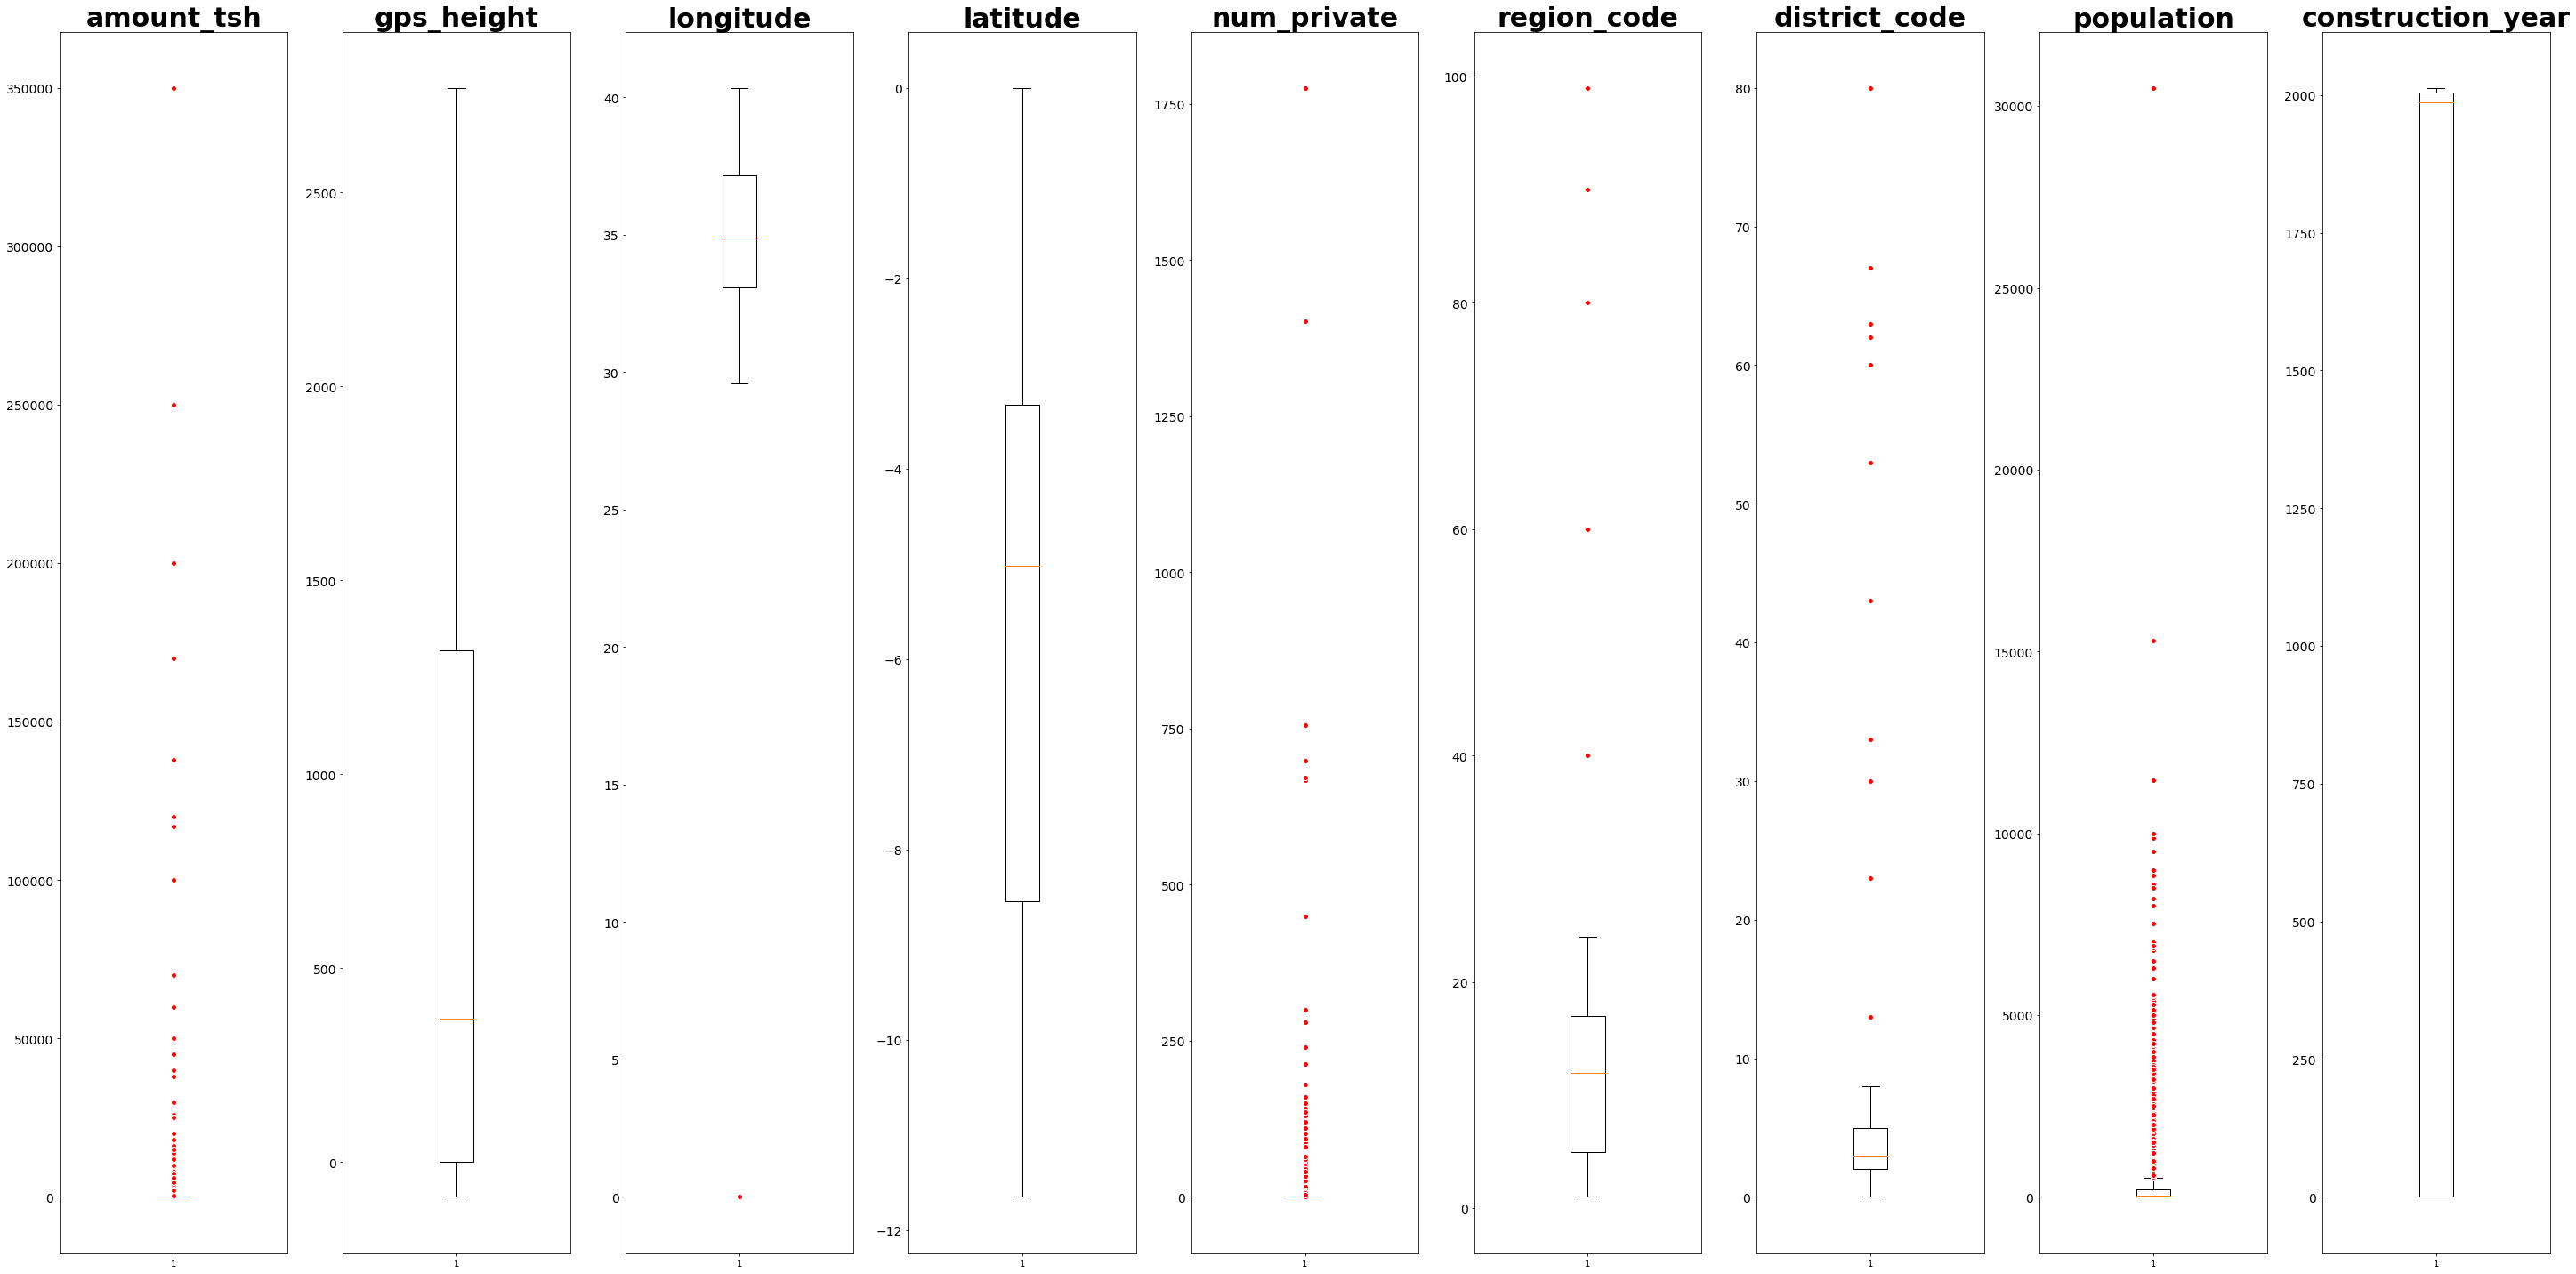

In [86]:
# Create a box plot of each column
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(X_num.columns), figsize=(40,20))

for i, ax in enumerate(axs.flat):
    ax.boxplot(X_num.iloc[:,i], flierprops=red_circle)
    X_num.iloc[:,i]
    ax.set_title(X_num.columns[i], fontsize=30, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
plt.tight_layout();

### Dropping Columns

The following columns are geographical locations:

In [50]:
geo_cols = ['longitude', 'latitude', 'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward']

In [51]:
for column in geo_cols:
    print(X[column].name)
    print(X[column].nunique())
    if X[column].nunique() < 30:
        print(X[column].unique())
    else:
        pass
    print('')

longitude
57516

latitude
57517

basin
9
['Lake Nyasa' 'Lake Victoria' 'Pangani' 'Ruvuma / Southern Coast'
 'Internal' 'Lake Tanganyika' 'Wami / Ruvu' 'Rufiji' 'Lake Rukwa']

subvillage
19287

region
21
['Iringa' 'Mara' 'Manyara' 'Mtwara' 'Kagera' 'Tanga' 'Shinyanga' 'Tabora'
 'Pwani' 'Ruvuma' 'Kilimanjaro' 'Rukwa' 'Mwanza' 'Kigoma' 'Lindi' 'Dodoma'
 'Arusha' 'Mbeya' 'Singida' 'Morogoro' 'Dar es Salaam']

region_code
27
[11 20 21 90 18  4 17 14 60 10  3 15 19 16 80  1  6  2 12 13  5  7 99 24
  9  8 40]

district_code
20
[ 5  2  4 63  1  8  3  6 43  7 23 33 53 62 60 30 13  0 80 67]

lga
125

ward
2092



In [52]:
X[geo_cols]

,longitude,latitude,basin,subvillage,region,region_code,district_code,lga,ward
0,34.938093,-9.856322,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi
1,34.698766,-2.147466,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta
2,37.460664,-3.821329,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika
3,38.486161,-11.155298,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu
4,31.130847,-1.825359,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi
...,...,...,...,...,...,...,...,...,...
59395,37.169807,-3.253847,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi
59396,35.249991,-9.070629,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo
59397,34.017087,-8.750434,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala
59398,35.861315,-6.378573,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu


In [53]:
print(X['subvillage'].nunique())
print(X['lga'].nunique())
print(X['ward'].nunique())

19287
125
2092


In [54]:
drop_cols += ['subvillage', 'region', 'lga', 'ward']

In [55]:
extract_cols = ['extraction_type', 'extraction_type_group', 'extraction_type_class']
X[extract_cols]

,extraction_type,extraction_type_group,extraction_type_class
0,gravity,gravity,gravity
1,gravity,gravity,gravity
2,gravity,gravity,gravity
3,submersible,submersible,submersible
4,gravity,gravity,gravity
...,...,...,...
59395,gravity,gravity,gravity
59396,gravity,gravity,gravity
59397,swn 80,swn 80,handpump
59398,nira/tanira,nira/tanira,handpump


In [56]:
drop_cols += ['extraction_type_group', 'extraction_type_class']

In [57]:
quality_cols = ['water_quality', 'quality_group']
X[quality_cols]

,water_quality,quality_group
0,soft,good
1,soft,good
2,soft,good
3,soft,good
4,soft,good
...,...,...
59395,soft,good
59396,soft,good
59397,fluoride,fluoride
59398,soft,good


In [58]:
source_cols = ['source', 'source_type', 'source_class']
X[source_cols]

,source,source_type,source_class
0,spring,spring,groundwater
1,rainwater harvesting,rainwater harvesting,surface
2,dam,dam,surface
3,machine dbh,borehole,groundwater
4,rainwater harvesting,rainwater harvesting,surface
...,...,...,...
59395,spring,spring,groundwater
59396,river,river/lake,surface
59397,machine dbh,borehole,groundwater
59398,shallow well,shallow well,groundwater


In [59]:
drop_cols += ['source_type']

In [60]:
X[['management', 'management_group']]

,management,management_group
0,vwc,user-group
1,wug,user-group
2,vwc,user-group
3,vwc,user-group
4,other,other
...,...,...
59395,water board,user-group
59396,vwc,user-group
59397,vwc,user-group
59398,vwc,user-group


In [61]:
X['management_group'].unique()

array(['user-group', 'other', 'commercial', 'parastatal', 'unknown'],
      dtype=object)

In [62]:
X[['waterpoint_type', 'waterpoint_type_group']]

,waterpoint_type,waterpoint_type_group
0,communal standpipe,communal standpipe
1,communal standpipe,communal standpipe
2,communal standpipe multiple,communal standpipe
3,communal standpipe multiple,communal standpipe
4,communal standpipe,communal standpipe
...,...,...
59395,communal standpipe,communal standpipe
59396,communal standpipe,communal standpipe
59397,hand pump,hand pump
59398,hand pump,hand pump


In [63]:
drop_cols += ['waterpoint_type_group']

In [64]:
X[['scheme_management', 'scheme_name']]

,scheme_management,scheme_name
0,VWC,Roman
1,Other,NaN
2,VWC,Nyumba ya mungu pipe scheme
3,VWC,NaN
4,NaN,NaN
...,...,...
59395,Water Board,Losaa Kia water supply
59396,VWC,Ikondo electrical water sch
59397,VWC,NaN
59398,VWC,NaN


In [65]:
drop_cols += ['scheme_name']

In [66]:
X[['payment', 'payment_type']]

,payment,payment_type
0,pay annually,annually
1,never pay,never pay
2,pay per bucket,per bucket
3,never pay,never pay
4,never pay,never pay
...,...,...
59395,pay per bucket,per bucket
59396,pay annually,annually
59397,pay monthly,monthly
59398,never pay,never pay


In [67]:
drop_cols += ['payment']

In [68]:
X[['quantity', 'quantity_group']]

,quantity,quantity_group
0,enough,enough
1,insufficient,insufficient
2,enough,enough
3,dry,dry
4,seasonal,seasonal
...,...,...
59395,enough,enough
59396,enough,enough
59397,enough,enough
59398,insufficient,insufficient


In [69]:
drop_cols += ['quantity_group']

In [70]:
X[['waterpoint_type', 'waterpoint_type_group']]

,waterpoint_type,waterpoint_type_group
0,communal standpipe,communal standpipe
1,communal standpipe,communal standpipe
2,communal standpipe multiple,communal standpipe
3,communal standpipe multiple,communal standpipe
4,communal standpipe,communal standpipe
...,...,...
59395,communal standpipe,communal standpipe
59396,communal standpipe,communal standpipe
59397,hand pump,hand pump
59398,hand pump,hand pump


In [71]:
drop_cols += ['waterpoint_type_group']

In [72]:
X['recorded_by'].nunique()

1

In [73]:
drop_cols += ['recorded_by', 'num_private', 'id']
drop_cols

['subvillage',
 'region',
 'lga',
 'ward',
 'extraction_type_group',
 'extraction_type_class',
 'source_type',
 'waterpoint_type_group',
 'scheme_name',
 'payment',
 'quantity_group',
 'waterpoint_type_group',
 'recorded_by',
 'num_private',
 'id']

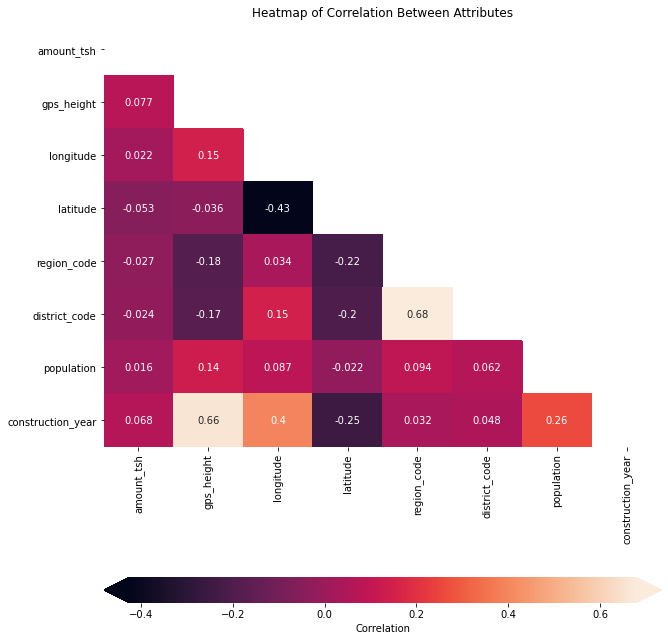

In [80]:
# Plotting correlation heatmap

corr = df.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(10, 12))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes");

### Plotting Missing Values

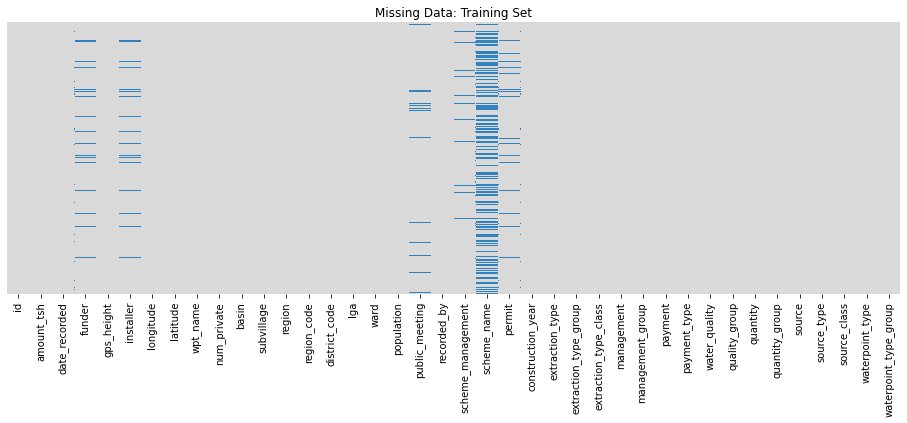

In [81]:
plt.figure(figsize = (16,5))
sns.heatmap(X.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

In [82]:
def missing_zero_values_table(X):
        zero_val = (X == 0.00).astype(int).sum(axis=0)
        mis_val = X.isnull().sum()
        mis_val_percent = 100 * X.isnull().sum() / len(X)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(X)
        mz_table['Data Type'] = X.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(X.shape[1]) + " columns and " + str(X.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(X)

Your selected dataframe has 40 columns and 59400 Rows.
There are 7 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
scheme_name,0,28166,47.4,28166,47.4,object
scheme_management,0,3877,6.5,3877,6.5,object
installer,0,3655,6.2,3655,6.2,object
funder,0,3635,6.1,3635,6.1,object
public_meeting,5055,3334,5.6,8389,14.1,object
permit,17492,3056,5.1,20548,34.6,object
subvillage,0,371,0.6,371,0.6,object
